# Introduction to Machine Learning with Python


Library pandas digunakan untuk load dataset dalam bentuk csv, melakukan analisa terhadap data, serta mempersiapkan dataset untuk keperluan training.

In [1]:
# Libary yang akan kita pakai!

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Cek file dan dataset yang akan digunakan
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")

File ditemukan


In [3]:
# Membaca dataset dari path(directory)
dataset = pd.read_csv(directory)
# Melihat dataset yang digunakan
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [4]:
dataset.head() # Mengeluarkan beberapa data awal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
dataset.info() # Memunculkan informasi awal mengenai dataset (data langsung dikenal sebagai float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
dataset.describe() # Mengeluarkan analisa awal mengenai dataset

# Atau print(dataset.describe()) apabila langsung dijalankan di command line selain jupyter notebook

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
print(dataset.dtypes.tolist()) # Ada data apa saja yang di dataset?

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


In [8]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])
dataset_numbers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


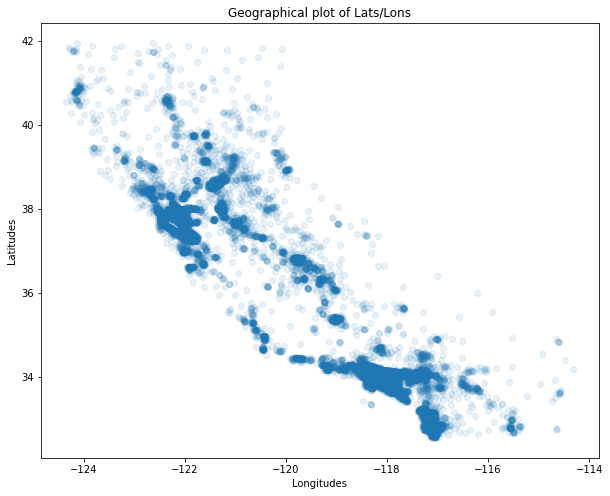

In [9]:
# Plotting data dari dataset dengan Plot Scatter
plt.figure(figsize=(10,8))
plt.scatter('longitude','latitude',data=dataset,alpha=0.1)
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

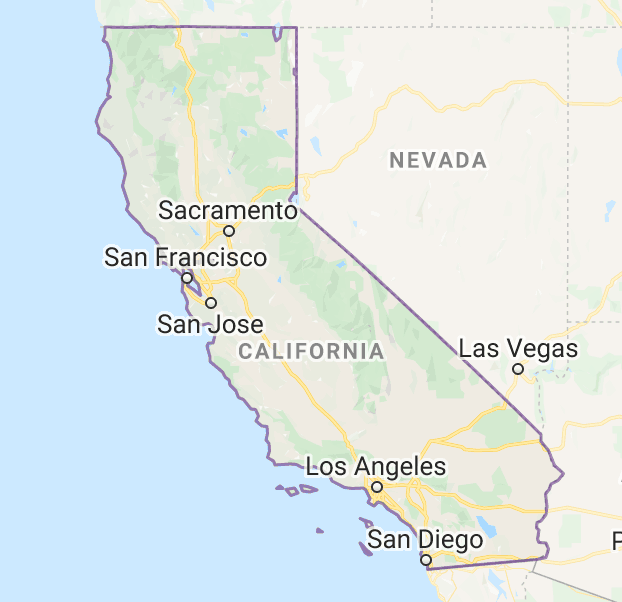

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e4403080>,
      dtype=object)

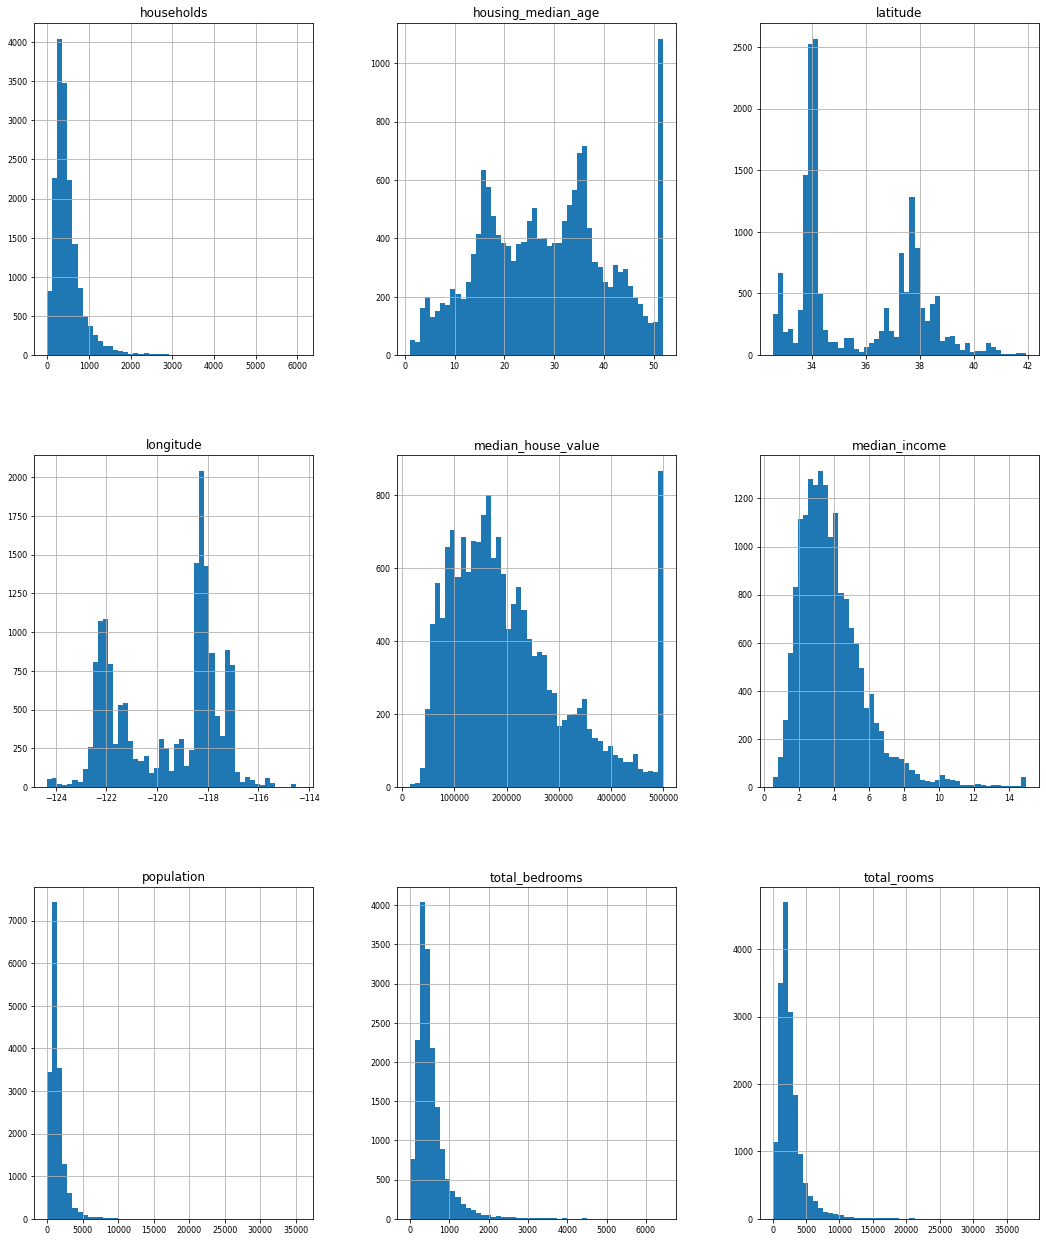

In [10]:
# Visualisasi data berupa histogram. (Bins untuk jarak antar data pada histogram)
dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8) 

**Menghitung korelasi antar setiap feature/attribute**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e42055f8>,
      dtype=object)

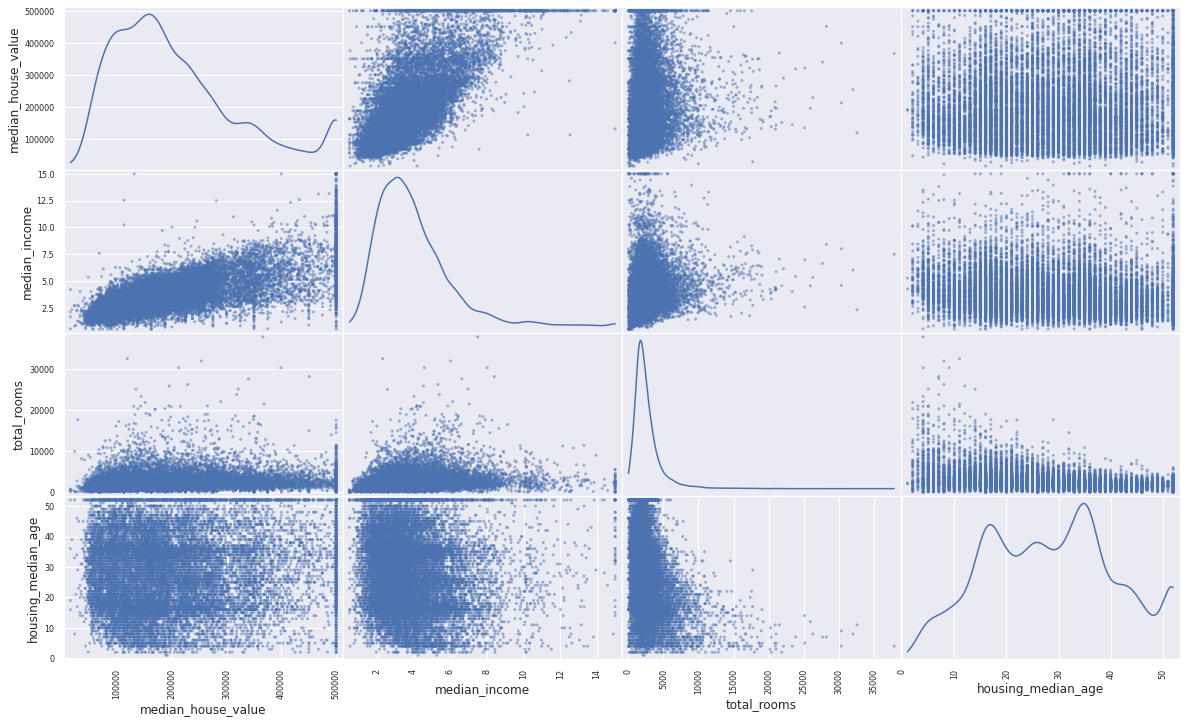

In [11]:
# Visualisasikan data menggunakan Seaborn
sns.set()
feat = ['median_house_value','median_income','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')                                  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


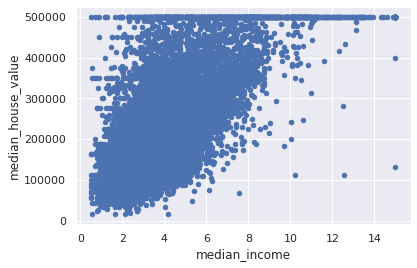

In [12]:
# Plotting feature median_income dan median_house value dengan Scatter
dataset.plot(kind="scatter", x="median_income", y="median_house_value")
plt.show()

In [13]:
# Menampilkan korelasi paling bagus terhadap median_house_value
dataset_numbers_corr = dataset_numbers.corr()['median_house_value'][:-1] # -1 karena kolom terakhir adalah median_house_value ()
# Filter korelasi paling bagus(abs untuk membuat semua nilai absolut agar korelasi negatif masuk dlm filtering)
golden_features_list = dataset_numbers_corr[abs(dataset_numbers_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with median_house_value:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with median_house_value:
median_income    0.691871
Name: median_house_value, dtype: float64


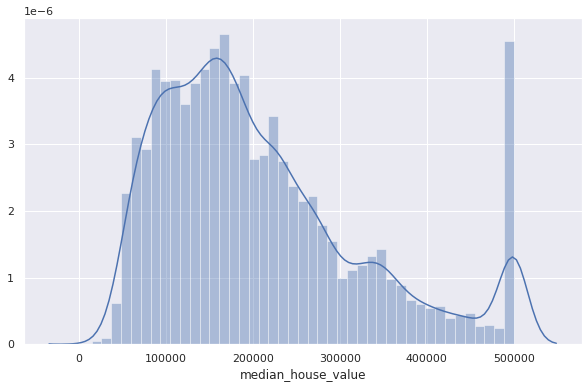

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(dataset_numbers['median_house_value'])
plt.show()

Beberapa hal yang perlu diingat:
* Ini merupakan grafik histogram, yang menunjukan karakteristik sebaran data secara visual.
* Contoh di grafik ini, karena mean dari median_house_value bernilai 207,300.91, puncak dari grafik juga berada di angka tersebut (bagian kurva paling tinggi).
* Grafik ini dapat menunjukan apakah terdapat outlier/data anomali yang harus kita hapus. Data anomali berjumlah relatif sedikit dan dapat menghambat kita dalam menemukan pattern dalam dataset. Outlier bisa ada karena kesalahan dalam pencatatan data, ataupun memang muncul sebagai anomali yang jarang terjadi.

In [15]:
correlation_matrix = dataset.corr()
corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_dataframe = pd.DataFrame({'Column': corr.index,
                 'Correlation with median_house_value': corr.values})

correlation_dataframe

,Column,Correlation with median_house_value
0,median_house_value,1.000000
1,median_income,0.691871
2,total_rooms,0.130991
3,housing_median_age,0.106758
4,households,0.061031
5,total_bedrooms,0.045783
6,population,-0.027850
7,longitude,-0.044982
8,latitude,-0.144917


In [16]:
dataset_corr = dataset.corr()['median_house_value'][:-1] # -1 karena kolom terakhir adalah median_house_value
golden_features_list = dataset_corr[abs(dataset_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with median_house_value:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with median_house_value:
median_income    0.691871
Name: median_house_value, dtype: float64


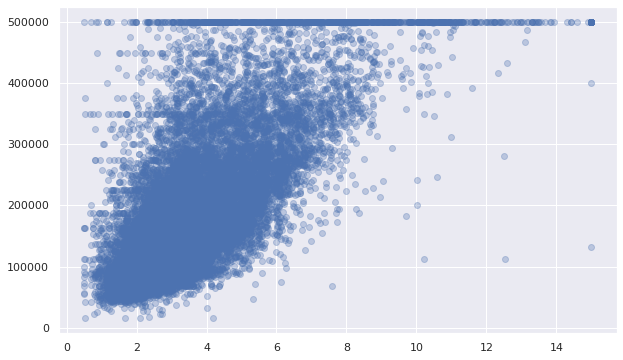

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y=dataset['median_house_value'], x=dataset['median_income'], alpha=0.3)

In [18]:
# Cek, apakah ada yang kosong?
for i in dataset.columns:
  print(i,': ',len(dataset[dataset[i].isnull()][i])) # Membuat array untuk mengecek

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  0
population :  0
households :  0
median_income :  0
median_house_value :  0


In [19]:
# Preprocessing data
from sklearn import preprocessing
# Scaling data agar data tidak terlalu tersebar
scaler = preprocessing.StandardScaler() 

dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [20]:
# Menghilangkan feature median_housing_value karena merupakan feature yang ingin diprediksi
feature = dataset.drop(['median_house_value'], axis=1) # Hapus kolom median_house_value dari feature karena ini adalah variabel yang kita ingin diprediksi
label = dataset['median_house_value'] # Kolom median_house_value digunakan karena ini adalah yang ingin kita prediksi

# Normalisasi data
feature_scaled = scaler.fit_transform(feature.values) # Features setelah discaling
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten() # Label/hasil prediksi setelah scaling. Me-Reshape array menjadi 2 dimensi

print(feature_scaled)
print(label_scaled)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.16167524 -0.11760942
  -0.44666313]
 [-2.36291168  2.88908527 -0.76187201 ... -0.1146295  -0.06039367
  -0.99778717]
 [-2.387848    2.29955006  1.85997083 ... -0.54326844 -0.60134255
  -0.45536288]]
[-1.21055773 -1.09674535 -1.04846131 ... -0.89412482 -1.04759909
 -0.97172417]


In [21]:
# Pisahkan training & test set
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2, random_state=10) # 80% training, 20% testing

# Menghasilkan feature untuk training & testing, serta label untuk training & testing

**Machine Learning Algorithms**

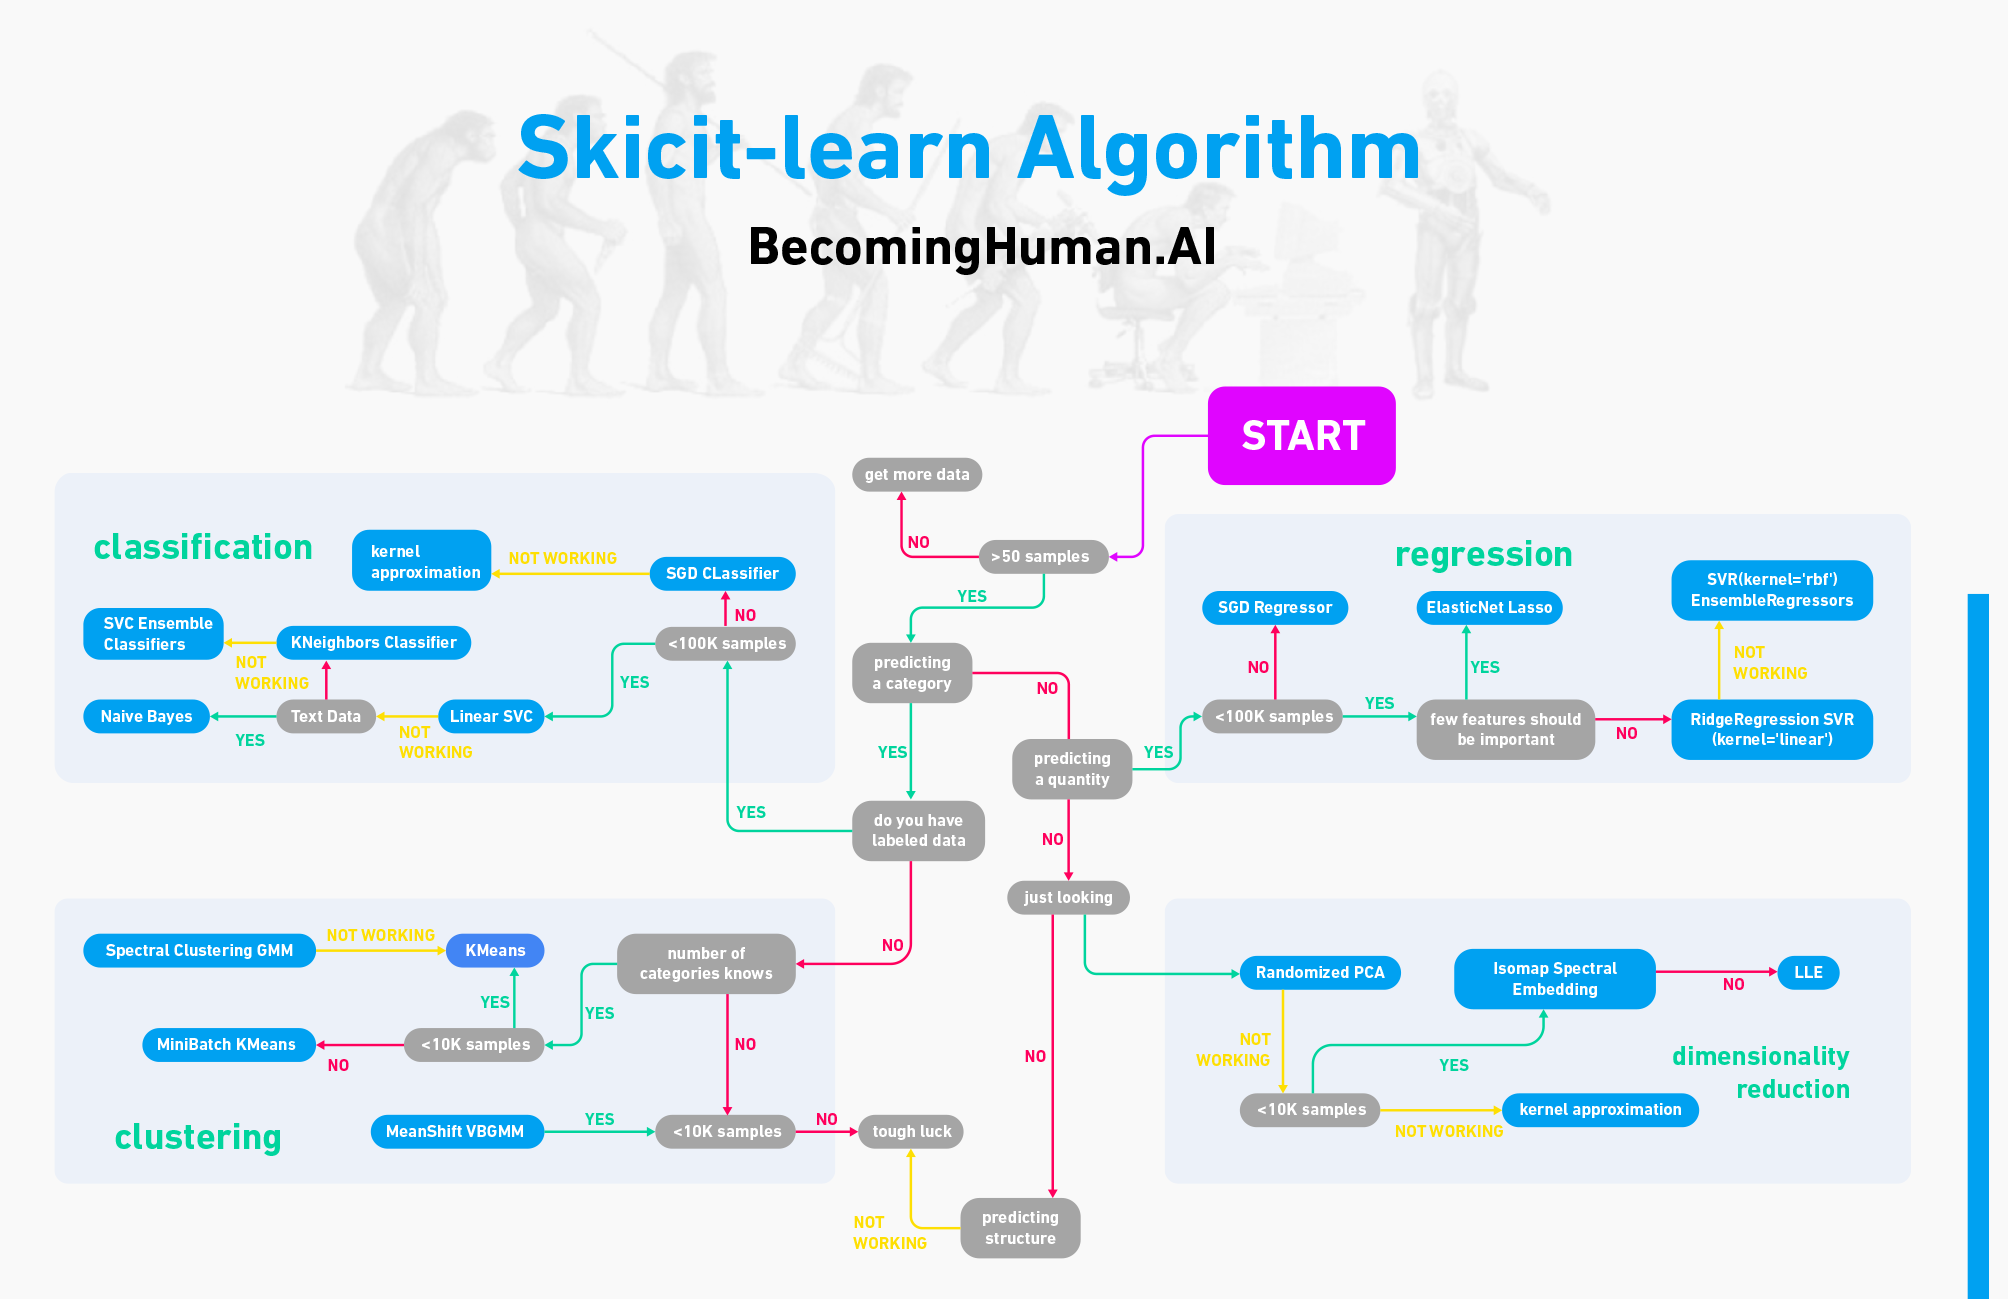

**Linear Regression**

In [22]:
# Memulai prediksi dengan Linear Regression
from sklearn import linear_model # Model Linear Regression
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
# Mengukur performa prediksi data training dengan r2_score
r2_score(linear_reg.predict(feature_train), label_train)

0.444857757761818

In [23]:
# Scoring data testing
r2_score(linear_reg.predict(feature_test), label_test)

0.40312313978656333

^Hasil data training < data testing dan berbeda sedikit menjadikan data tidak overfitting dan underfitting. Tetapi akurasi masih kecil

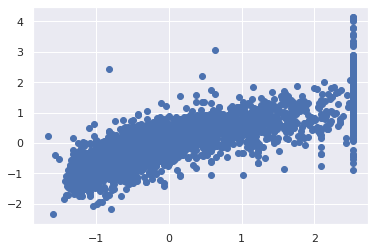

In [24]:
# Plotting hasil training terhadap testing
predictions = linear_reg.predict(feature_test)
predictions
plt.scatter(label_test, predictions)

In [25]:
from sklearn.model_selection import cross_val_score

cross_validation_score = cross_val_score(linear_reg, feature_train,label_train, cv=10)
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

print(cross_validation_score)
print(reg_score)

[0.65148154 0.66230499 0.57610768 0.67968126 0.67699547 0.64584206
 0.62944621 0.63807316 0.60570851 0.63015911]
0.40312313978656333


**Decision Tree Regressor**

In [26]:
# Prediksi dengan Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)
# Scoring prediksi data training
r2_score(tree_reg.predict(feature_train),label_train)

0.9999999999999583

In [27]:
# Scoring prediksi data testing
r2_score(tree_reg.predict(feature_test),label_test)

0.6396208372166869

^Karena skor training > testing dan berbeda jauh maka disebut overfitting

Ini merupakan contoh **overfitting** (Ini sama saja dengan atas)

In [28]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.65840428, 0.62357754, 0.55023645, 0.59373656, 0.66368886,
       0.58248174, 0.57030041, 0.64746052, 0.65250141, 0.64508743])

In [29]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) 
tree_score

0.6396208372166869

**Random Forest Regressor**

In [30]:
# Prediksi dengan Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(feature_train,label_train)
r2_score(forest_reg.predict(feature_train), label_train)

0.9717616705156036

In [31]:
# Validasi data dengan cross validation(cv = banyak data yang ingin dikelompokan)
cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)

print(cross_validation_score)

[0.8261314  0.82931781 0.80689358 0.81925483 0.83419435 0.83287966
 0.80196071 0.81496385 0.79239266 0.82050248]


In [32]:

forest_score = r2_score(forest_reg.predict(feature_test),label_test) 
forest_score

0.7597551776039497

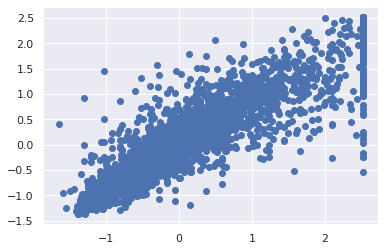

In [33]:
# Plotting hasil training terhadap testing
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

# Assignments

1. Visualisasikan korelasi feature median_house_value dengan `total_rooms`, `housing_median_age`, dan `households` menggunakan scatter plot.

2. Lakukan training dengan komposisi berikut:
  * 90% training data & 10% testing
  * 85% training data & 15% testing

  Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

  Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.

3. Gunakan `SVR` (SVM Regression) (`from sklearn.svm import SVR`) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan `LinearRegression`. Tariklah kesimpulan yang didapat.
  * Hint: Cek https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html


Bonus Assignment: Cari akurasi tertinggi dengan algoritma manapun

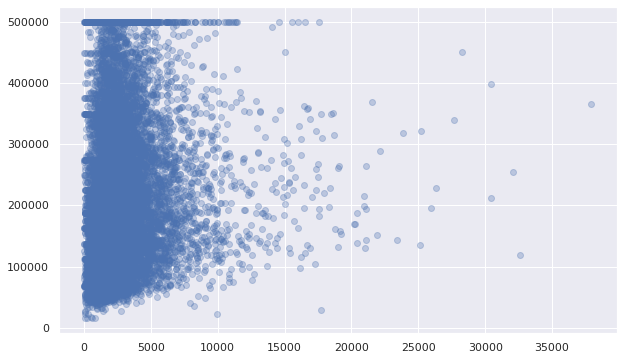

In [34]:
# Jawaban 1
# Plot total_rooms terhadap median_house_value
plt.figure(figsize=(10,6))
plt.scatter(y=dataset['median_house_value'], x=dataset['total_rooms'], alpha=0.3)

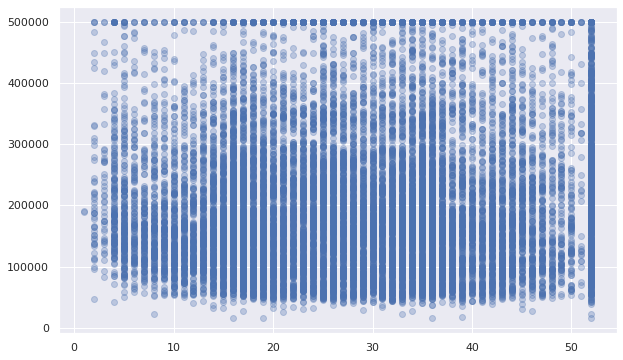

In [35]:
# Plot housing_median_age terhadap median_house_value
plt.figure(figsize=(10,6))
plt.scatter(y=dataset['median_house_value'], x=dataset['housing_median_age'], alpha=0.3)

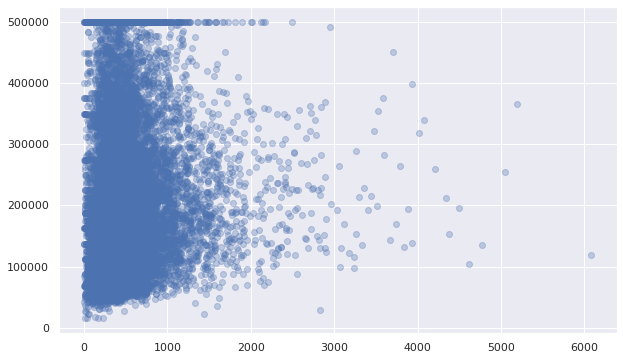

In [36]:
# Plot households terhadap median_house_value
plt.figure(figsize=(10,6))
plt.scatter(y=dataset['median_house_value'], x=dataset['households'], alpha=0.3)

In [37]:
# Jawaban 2
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.15) # 85% training, 15% testing

In [38]:
# Linear Regression
linear2_reg = linear_model.LinearRegression()
linear2_reg.fit(feature_train,label_train)
# Mengukur performa prediksi data training dengan r2_score
r2_score(linear2_reg.predict(feature_train), label_train)

0.45314223732701

In [39]:
# R2 Score
r2_score(linear2_reg.predict(feature_test), label_test)

0.39557531682266245

In [40]:
# Random Forest
forest2_reg = RandomForestRegressor()
forest2_reg.fit(feature_train,label_train)
# Scoring prediksi data training
r2_score(forest2_reg.predict(feature_train),label_train)

0.9726394490403448

In [41]:
# Scoring data testing
r2_score(forest2_reg.predict(feature_test),label_test)

0.747165218338729

In [50]:
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.10) # 90% training, 10% testing

In [51]:
# Linear Regression
linear3_reg = linear_model.LinearRegression()
linear3_reg.fit(feature_train,label_train)
# Mengukur performa prediksi data training dengan r2_score
r2_score(linear3_reg.predict(feature_train), label_train)

0.4406866352076816

In [44]:
r2_score(linear3_reg.predict(feature_test), label_test)

0.39414878668331854

In [45]:
# Random Forest
forest3_reg = RandomForestRegressor()
forest3_reg.fit(feature_train,label_train)
# Scoring prediksi data training
r2_score(forest3_reg.predict(feature_train),label_train)

0.9718760047045635

In [46]:
# Scoring data testing
r2_score(forest3_reg.predict(feature_test),label_test)

0.7703754989970242

**R2 Score(80% Training : 20% Testing)**

Linear Regression
- Training = 0.43740566834287076
- Testing = 0.4363843821828878

Random Forest
- Training = 0.9705096516194235
- Testing = 0.7625213825378525

**R2 Score(85% Training : 15% Testing)**

Linear Regression
- Training = 0.44597987498298763
- Testing = 0.43321117662956554

Random Forest
- Training = 0.9717472548031307
- Testing = 0.7578167089604348

**R2 Score(90% Training : 10% Testing)**

Linear Regression
- Training = 0.4384601084373686
- Testing = 0.45189059693288636

Random Forest
- Training = 0.9725500097832902
- Testing = 0.7602547665066932

Kesimpulan : Untuk akurasi terbaik tetap pada Random Forest dengan komposisi 80% Training dan 20% Test. Akan tetapi semakin besar pengalokasian data untuk data training tidak menjamin bahwa R2 Scores semakin besar.

In [52]:
# Jawaban 3
from sklearn.svm import SVR

feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.20)

svr_rbf = SVR(kernel='rbf', C=50, gamma=0.1, epsilon=.1)
svr_rbf.fit(feature_train, label_train)
score_rbf = r2_score(svr_rbf.predict(feature_test), label_test)

print("R2 Score SVM(RBF)", score_rbf)


Score (RBF) 0.7080623699598703


Kesimpulan : R2 Score SVR lebih tinggi dibanding dengan Linear Regression. Akan tetapi lebih rendah dibandingkan dengan Random Forest

**Bonus Assignment**

In [90]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

In [109]:
# 80% : 20% Split
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.20)

In [110]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(feature_train, label_train)
predictions_rr = rr.predict(feature_train)
print(r2_score(label_train, predictions_rr))

predictions_rr = rr.predict(feature_test)
print(r2_score(label_test, predictions_rr))

0.6400039486080877
0.6463342256718685


In [112]:
# Lasso Regression
lass = Lasso(alpha=0.01)
lass.fit(feature_train, label_train)
predictions_lass = lass.predict(feature_train)
print(r2_score(label_train, predictions_lass))

predictions_lass = lass.predict(feature_test)
print(r2_score(label_test, predictions_lass))

0.6331632882672805
0.6355617398694853


In [113]:
# Elastic Net
enet = ElasticNet(alpha=0.01)
enet.fit(feature_train, label_train)
predictions_enet = enet.predict(feature_train)
print(r2_score(label_train, predictions_enet))

predictions_enet = enet.predict(feature_test)
print(r2_score(label_test, predictions_enet))

0.6365423245767482
0.6398927442954805


In [114]:
# SGD Regressor
sgdreg = SGDRegressor(alpha=0.01)
sgdreg.fit(feature_train, label_train)
predictions_sgdreg = sgdreg.predict(feature_train)
print(r2_score(label_train, predictions_sgdreg))

predictions_sgdreg = sgdreg.predict(feature_test)
print(r2_score(label_test, predictions_sgdreg))

0.6378183012626055
0.6424291062863623


**R2 Score(80% Training : 20% Testing)**

Linear Regression
- Training = 0.43740566834287076
- Testing = 0.4363843821828878

Random Forest
- Training = 0.9705096516194235
- Testing = 0.7625213825378525

Ridge Regression
- Training = 0.6400039486080877
- Testing = 0.6463342256718685

Lasso Regression
- Training = 0.6331632882672805
- Testing = 0.6355617398694853

Elastic Net Regression
- Training = 0.6365423245767482
- Testing = 0.6398927442954805

SGD Regression
- Training = 0.6378183012626055
- Testing = 0.6424291062863623